# Project 2 - Movies
### By Benjamin Muniz

In [1]:
import pandas as pd
import re

# Read CSV files
country = pd.read_csv("country.csv")
department = pd.read_csv("department.csv")
gender = pd.read_csv("gender.csv")
genre = pd.read_csv("genre.csv")
keyword = pd.read_csv("keyword.csv")
language_role = pd.read_csv("language_role.csv")
movie_cast = pd.read_csv("movie_cast.csv")
movie_company = pd.read_csv("movie_company.csv")
movie_crew = pd.read_csv("movie_crew.csv")
movie_genre = pd.read_csv("movie_genre.csv")
movie_keywords = pd.read_csv("movie_keywords.csv")
movie_languages = pd.read_csv("movie_languages.csv")
person = pd.read_csv("person.csv")
production_company = pd.read_csv("production_company.csv")
production_country = pd.read_csv("production_country.csv")

# Read JSON files
language = pd.read_json("language.json")
movie = pd.read_json("movie.json")

# Clean column names by stripping extra whitespace
country.rename(columns={col: col.strip() for col in country.columns}, inplace=True)
department.rename(columns={col: col.strip() for col in department.columns}, inplace=True)
gender.rename(columns={col: col.strip() for col in gender.columns}, inplace=True)
genre.rename(columns={col: col.strip() for col in genre.columns}, inplace=True)
keyword.rename(columns={col: col.strip() for col in keyword.columns}, inplace=True)
language_role.rename(columns={col: col.strip() for col in language_role.columns}, inplace=True)
movie_cast.rename(columns={col: col.strip() for col in movie_cast.columns}, inplace=True)
movie_company.rename(columns={col: col.strip() for col in movie_company.columns}, inplace=True)
movie_crew.rename(columns={col: col.strip() for col in movie_crew.columns}, inplace=True)
movie_genre.rename(columns={col: col.strip() for col in movie_genre.columns}, inplace=True)
movie_keywords.rename(columns={col: col.strip() for col in movie_keywords.columns}, inplace=True)
movie_languages.rename(columns={col: col.strip() for col in movie_languages.columns}, inplace=True)
person.rename(columns={col: col.strip() for col in person.columns}, inplace=True)
production_company.rename(columns={col: col.strip() for col in production_company.columns}, inplace=True)
production_country.rename(columns={col: col.strip() for col in production_country.columns}, inplace=True)
language.rename(columns={col: col.strip() for col in language.columns}, inplace=True)
movie.rename(columns={col: col.strip() for col in movie.columns}, inplace=True)

# Define a helper function to clean cell contents (remove extra whitespace)
def cleanCell2(df):
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Clean the data in each DataFrame
cleanCell2(country)
cleanCell2(department)
cleanCell2(gender)
cleanCell2(genre)
cleanCell2(keyword)
cleanCell2(language_role)
cleanCell2(movie_cast)
cleanCell2(movie_company)
cleanCell2(movie_crew)
cleanCell2(movie_genre)
cleanCell2(movie_keywords)
cleanCell2(movie_languages)
cleanCell2(person)
cleanCell2(production_company)
cleanCell2(production_country)
cleanCell2(language)
cleanCell2(movie)


# __Project 1: Reports__

## _1. Movie Statistics Report_

Skills: GroupBy, Aggregation, Sorting

- Top 10 movies with the highest revenue.

- Average revenue, budget, and runtime by movie status (e.g., Released, Rumoured).

- Correlation between budget and revenue.

In [2]:
# Top 10 movies with the highest revenue.
top10 = movie.sort_values(by='revenue', ascending=False).head(10)
display(top10[['title', 'revenue', 'budget']])

# Average Revenue, Budget, Runtime by Status
movie_grouped = movie.dropna(subset=['movie_status', 'revenue', 'budget', 'runtime'])
average_stats = movie_grouped.groupby('movie_status')[['revenue', 'budget', 'runtime']].mean().reset_index()
average_stats['revenue'] = average_stats['revenue'].astype(int).apply(lambda x: f"{x:,}")
average_stats['budget'] = average_stats['budget'].astype(int).apply(lambda x: f"{x:,}")
average_stats['runtime'] = average_stats['runtime'].round(1)
display(average_stats)

# Correlation Between Budget and Revenue
correlation_data = movie.dropna(subset=['budget', 'revenue'])
correlation = correlation_data['budget'].corr(correlation_data['revenue'])
print("\nCorrelation between budget and revenue:", correlation)

,title,revenue,budget
2702,Avatar,2787965087,237000000
256,Titanic,1845034188,200000000
2861,The Avengers,1519557910,220000000
4108,Jurassic World,1513528810,150000000
4204,Furious 7,1506249360,190000000
3983,Avengers: Age of Ultron,1405403694,280000000
4025,Frozen,1274219009,150000000
3704,Iron Man 3,1215439994,200000000
4327,Minions,1156730962,74000000
4519,Captain America: Civil War,1153304495,250000000


,movie_status,revenue,budget,runtime
0,Post Production,"280,577","1,300,000",95.7
1,Released,"82,397,707","29,092,673",106.9
2,Rumored,0,"11,200",76.0



Correlation between budget and revenue: 0.7308228569244629


## _2. Language Diversity Report_

Skils: Merging, Filtering, Value Counts

- Count of movies per original language.

- List of movies with multiple spoken languages.

- Languages that most frequently appear as "Spoken" roles.

In [3]:
# Add role name to each row
movie_lang_roles = movie_languages.merge(language_role, left_on='language_role_id', right_on='role_id') 

# Keep only 'Original' roles
original_langs = movie_lang_roles[movie_lang_roles['language_role'] == 'Original']
original_counts = original_langs['language_id'].value_counts().reset_index()
original_counts.columns = ['language_id', 'movie_count']
original_language_stats = original_counts.merge(language, on='language_id')
display(original_language_stats[['language_name', 'movie_count']].head(10))



# Merge movie_languages with language_role to identify roles (Original or Spoken)
spoken_roles = movie_languages.merge(language_role, left_on='language_role_id', right_on='role_id')

# Filter to keep only 'Spoken' roles
spoken_only = spoken_roles[spoken_roles['language_role'] == 'Spoken']
spoken_counts = spoken_only.groupby('movie_id').size().reset_index(name='num_spoken_languages')
multi_spoken_movies = spoken_counts[spoken_counts['num_spoken_languages'] > 1]
multi_spoken_movies_named = multi_spoken_movies.merge(movie[['movie_id', 'title']], on='movie_id')
display(multi_spoken_movies_named.head(10))



# Count how many times each language_id appears in Spoken roles
spoken_lang_counts = spoken_only['language_id'].value_counts().reset_index()
spoken_lang_counts.columns = ['language_id', 'spoken_count']
spoken_lang_stats = spoken_lang_counts.merge(language, on='language_id')
display(spoken_lang_stats[['language_name', 'spoken_count']].head(10))

,language_name,movie_count
0,English,4505
1,Français,70
2,Español,32
3,普通话,27
4,Deutsch,27
5,हिन्दी,19
6,日本語,16
7,Italiano,14
8,广州话 / 廣州話,12
9,한국어조선말,11


,movie_id,num_spoken_languages,title
0,18,3,The Fifth Element
1,24,3,Kill Bill: Vol. 1
2,25,4,Jarhead
3,28,4,Apocalypse Now
4,58,4,Pirates of the Caribbean: Dead Man's Chest
5,62,2,2001: A Space Odyssey
6,66,2,Absolute Power
7,69,2,Walk the Line
8,70,2,Million Dollar Baby
9,75,2,Mars Attacks!


,language_name,spoken_count
0,English,4485
1,Français,437
2,Español,351
3,Deutsch,262
4,Italiano,188
5,Pусский,185
6,普通话,107
7,日本語,97
8,Português,68
9,العربية,67


## _3. Popularity vs Quality Report_

Skills: Visualization, Correlation

- Scatter plot: Popularity vs. Vote Average.

- Which movies are both highly popular and critically acclaimed (above 8.0 vote avg and popularity > threshold)?

- Heatmap of correlations between numeric fields like revenue, budget, popularity, vote_average.

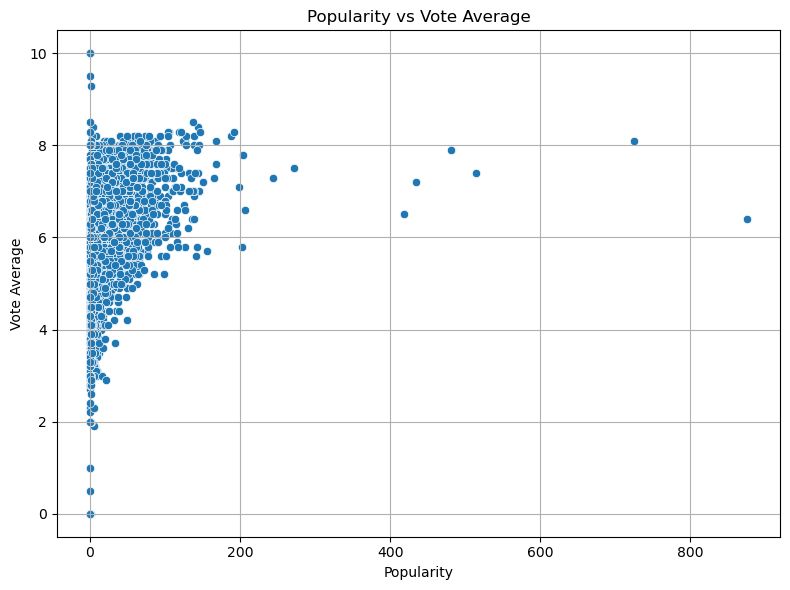

,title,vote_average,popularity
1,Star Wars,8.1,126.393695
3,Forrest Gump,8.2,138.133331
26,American History X,8.2,73.567232
30,Memento,8.1,60.715151
56,The Lord of the Rings: The Return of the King,8.1,123.630332
57,もののけ姫,8.2,60.732738
58,千と千尋の神隠し,8.3,118.968562
68,The Dark Knight,8.2,187.322927
99,Dead Poets Society,8.1,55.458584
110,The Godfather,8.4,143.659698


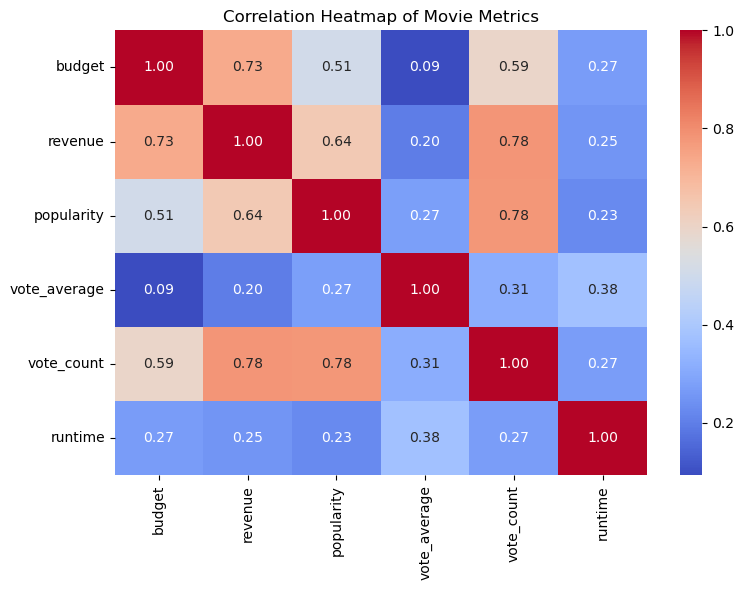

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values just in case
movie_clean = movie.dropna(subset=['popularity', 'vote_average'])

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=movie_clean, x='popularity', y='vote_average')
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter for vote_average > 8.0 and popularity > 50 
popular_critically_acclaimed = movie[(movie['vote_average'] > 8.0) & (movie['popularity'] > 50)]

# Show top 10
display(popular_critically_acclaimed[['title', 'vote_average', 'popularity']].head(10))

# Select relevant numeric columns
numeric_cols = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']
numeric_data = movie[numeric_cols].dropna()

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Movie Metrics')
plt.tight_layout()
plt.show()


## _4. Time Trend Report_

Skills: Time series, Date parsing

- Number of movies released per year.

- Average runtime or revenue per decade.

- Histogram of movie runtimes.

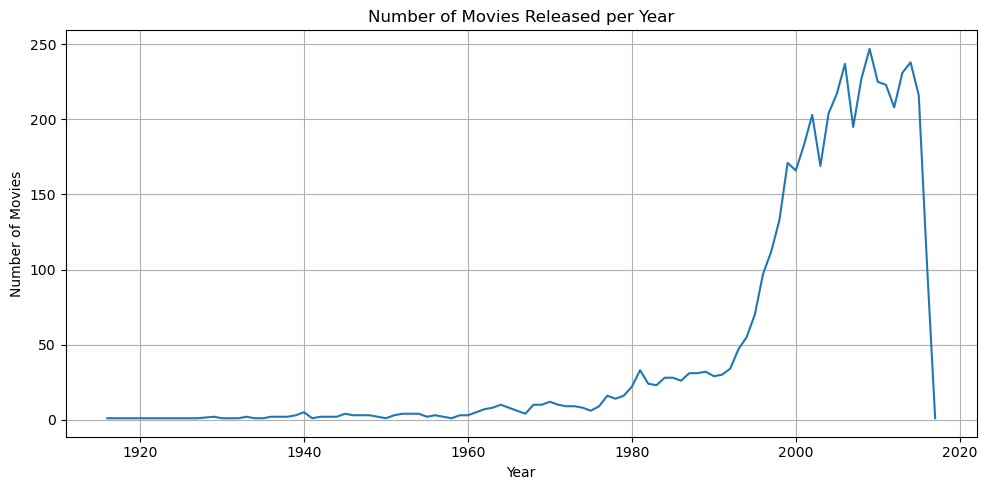

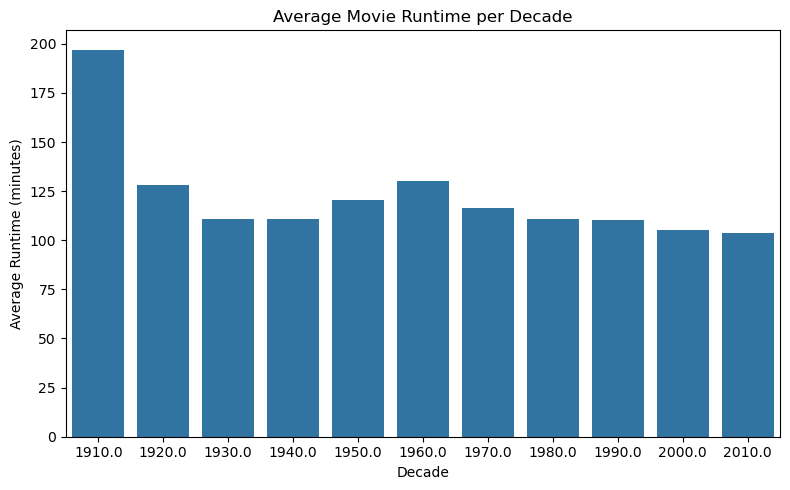

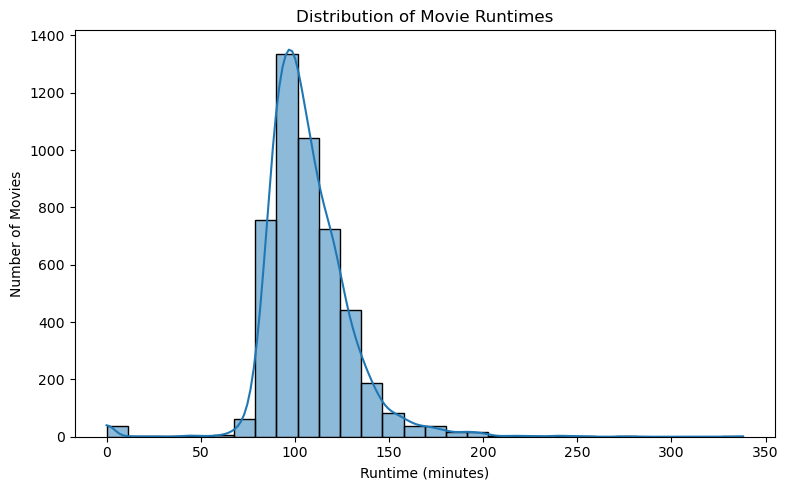

In [5]:
# Ensure release_date is in datetime format
movie['release_date'] = pd.to_datetime(movie['release_date'], errors='coerce')

# Extract the release year
movie['release_year'] = movie['release_date'].dt.year

# Count number of movies per year
movies_per_year = movie['release_year'].value_counts().sort_index()

# Plot it
plt.figure(figsize=(10, 5))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

# Remove missing runtimes
movie_runtime = movie.dropna(subset=['release_year', 'runtime']).copy()

# Create a decade column
movie_runtime.loc[:,'decade'] = (movie_runtime['release_year'] // 10) * 10

# Group by decade
runtime_by_decade = movie_runtime.groupby('decade')['runtime'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=runtime_by_decade, x='decade', y='runtime')
plt.title('Average Movie Runtime per Decade')
plt.xlabel('Decade')
plt.ylabel('Average Runtime (minutes)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(movie['runtime'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


## _5. Genre Analysis Report_

Skills: Many-to-many merging, Grouping

- Number of movies per genre.

- Average vote_average and revenue per genre.

- Top 5 genres by average popularity.

In [6]:
# Join genre names
movie_genre_named = movie_genre.merge(genre, on='genre_id')

# Merge with movie data to get vote_average, revenue, and popularity
movie_genre_full = movie_genre_named.merge(movie, on='movie_id')

genre_counts = movie_genre_full['genre_name'].value_counts().reset_index()
genre_counts.columns = ['genre_name', 'movie_count']
display(genre_counts)

avg_stats = movie_genre_full.groupby('genre_name')[['vote_average', 'revenue']].mean().reset_index()
display(avg_stats.sort_values(by='vote_average', ascending=False))

top5_popular_genres = movie_genre_full.groupby('genre_name')['popularity'].mean().reset_index()
top5_popular_genres = top5_popular_genres.sort_values(by='popularity', ascending=False).head(5)

display(top5_popular_genres)


,genre_name,movie_count
0,Drama,2297
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


,genre_name,vote_average,revenue
10,History,6.719797,5.752356e+07
18,War,6.713889,8.415587e+07
6,Drama,6.388594,5.211623e+07
12,Music,6.355676,4.845595e+07
9,Foreign,6.352941,3.646515e+05
2,Animation,6.341453,2.256930e+08
4,Crime,6.274138,6.615066e+07
5,Documentary,6.238182,9.838888e+06
14,Romance,6.207718,6.000239e+07
13,Mystery,6.183908,7.830093e+07


,genre_name,popularity
1,Adventure,39.268042
2,Animation,38.813439
15,Science Fiction,36.451806
8,Fantasy,36.387043
0,Action,30.940382


## _6. Cast Gender Distribution Report_

Skills: Grouping, Merging, Data Cleaning

- Gender distribution in cast per movie.

- Most common cast gender overall.

- Any noticeable trends over time?

,movie_id,Female,Male,Unspecified,title
0,5,14.0,8.0,2.0,Four Rooms
1,11,3.0,46.0,57.0,Star Wars
2,12,5.0,16.0,3.0,Finding Nemo
3,13,7.0,35.0,24.0,Forrest Gump
4,14,22.0,15.0,3.0,American Beauty


,gender,cast_count
0,Male,48291
1,Unspecified,33798
2,Female,24168


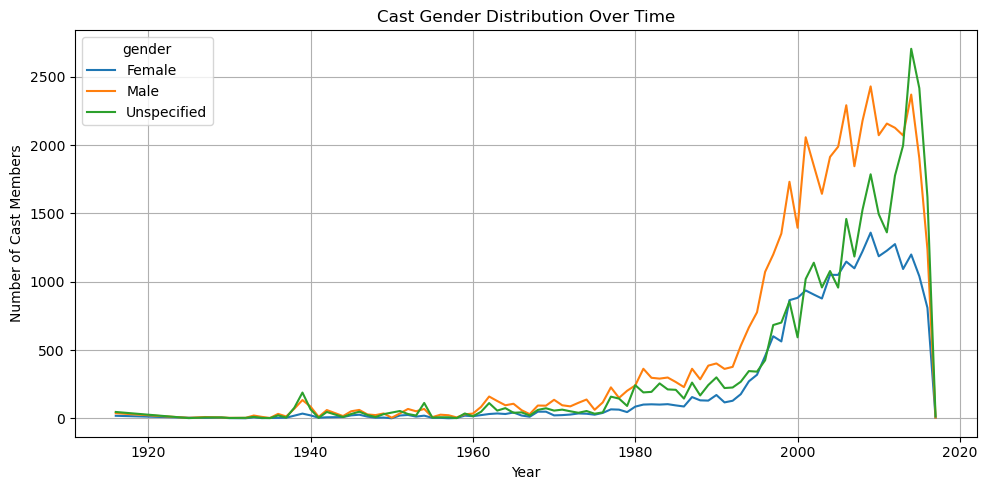

In [7]:
# Join cast with gender labels
cast_gender = movie_cast.merge(gender, on='gender_id', how='left')

# Count genders per movie
gender_dist_per_movie = cast_gender.groupby(['movie_id', 'gender'])['person_id'].count().reset_index()
gender_dist_per_movie = gender_dist_per_movie.pivot(index='movie_id', columns='gender', values='person_id').fillna(0)

# Add movie title
gender_dist_per_movie = gender_dist_per_movie.merge(movie[['movie_id', 'title']], on='movie_id')
display(gender_dist_per_movie.head())

gender_overall = cast_gender['gender'].value_counts().reset_index()
gender_overall.columns = ['gender', 'cast_count']
display(gender_overall)

# Merge with movie year
cast_gender_year = cast_gender.merge(movie[['movie_id', 'release_date']], on='movie_id')
cast_gender_year['release_year'] = pd.to_datetime(cast_gender_year['release_date'], errors='coerce').dt.year

# Group by year and gender
gender_trend = cast_gender_year.groupby(['release_year', 'gender']).size().reset_index(name='count')

# Plot trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=gender_trend, x='release_year', y='count', hue='gender')
plt.title('Cast Gender Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cast Members')
plt.tight_layout()
plt.grid(True)
plt.show()


In [8]:
print(gender.columns)


Index(['gender_id', 'gender'], dtype='object')


## _7. Crew & Departments Report_

Skills: Advanced joins, Grouping by multiple columns

- Top departments by number of staff across all movies.

- Which department has the highest number of jobs per movie?

- List of movies with the most crew members.

In [9]:
# 1. Top departments by number of staff across all movies
dept_counts = movie_crew.groupby('department_id')['person_id'].count().reset_index()
dept_counts = dept_counts.sort_values(by='person_id', ascending=False)
dept_counts.columns = ['department_id', 'staff_count']
display(dept_counts)

# 2. Average number of jobs per movie per department
dept_per_movie = movie_crew.groupby(['movie_id', 'department_id'])['job'].count().reset_index()
dept_per_movie.columns = ['movie_id', 'department_id', 'job_count']

avg_jobs_per_dept = dept_per_movie.groupby('department_id')['job_count'].mean().reset_index()
avg_jobs_per_dept = avg_jobs_per_dept.sort_values(by='job_count', ascending=False)
display(avg_jobs_per_dept)

# 3. Movies with the most unique crew members
crew_count_per_movie = movie_crew.groupby('movie_id')['person_id'].nunique().reset_index()
crew_count_per_movie.columns = ['movie_id', 'crew_count']

crew_with_titles = crew_count_per_movie.merge(movie[['movie_id', 'title']], on='movie_id')
top_movies = crew_with_titles.sort_values(by='crew_count', ascending=False).head(10)
display(top_movies)


,department_id,staff_count
2,3,27675
5,6,16176
6,7,14853
8,9,13826
7,8,11188
3,4,10688
0,1,9204
1,2,8149
4,5,7855
9,10,7553


,department_id,job_count
2,3,7.052752
8,9,6.940763
9,10,5.896175
6,7,4.957610
5,6,4.440296
7,8,4.289877
10,11,2.695749
0,1,2.591216
3,4,2.333624
4,5,2.191685


,movie_id,crew_count,title
4097,135397,430,Jurassic World
756,2749,329,15 Minutes
3997,106646,239,The Wolf of Wall Street
246,585,232,"Monsters, Inc."
190,435,223,The Day After Tomorrow
1269,9341,219,The Core
3456,49026,210,The Dark Knight Rises
1146,8836,195,The X Files: I Want to Believe
333,752,190,V for Vendetta
766,2789,186,The Chronicles of Riddick


## 8. _Keyword Trends Report_
 
Skills: Text processing, Grouping

- Top 20 most common keywords.

- Keywords most associated with high-revenue movies.

- Cluster movies by similar keywords (bonus clustering project!).

In [10]:
# Merge keyword labels into movie_keywords
keywords_full = movie_keywords.merge(keyword, on='keyword_id')

# Count keywords
keyword_counts = keywords_full['keyword_name'].value_counts().reset_index()
keyword_counts.columns = ['keyword', 'count']

# Top 20
top_20_keywords = keyword_counts.head(20)
display(top_20_keywords)

# Merge with movie revenue data
keywords_with_revenue = keywords_full.merge(movie[['movie_id', 'revenue']], on='movie_id')

# Group by keyword and compute average revenue
keyword_revenue = keywords_with_revenue.groupby('keyword_name')['revenue'].mean().reset_index()
keyword_revenue = keyword_revenue.sort_values(by='revenue', ascending=False)

# Top 20 high-revenue keywords
display(keyword_revenue.head(20))

# Bonus clustering similar movies
# Group keywords into sets per movie
movie_keyword_sets = keywords_full.groupby('movie_id')['keyword_name'].apply(set).reset_index()

# Join with movie titles
movie_keyword_sets = movie_keyword_sets.merge(movie[['movie_id', 'title']], on='movie_id')

# Compute similarity between movies based on shared keywords
from itertools import combinations

similar_movies = []

# Compare each pair of movies (you can limit to top N movies to make it faster)
for (id1, kw1), (id2, kw2) in combinations(movie_keyword_sets[['movie_id', 'keyword_name']].values, 2):
    common_keywords = kw1 & kw2
    if len(common_keywords) >= 3:  # Arbitrary threshold for 'similar'
        similar_movies.append({
            'movie_1': id1,
            'movie_2': id2,
            'shared_keywords': list(common_keywords),
            'num_shared': len(common_keywords)
        })

# Turn into a DataFrame
similar_df = pd.DataFrame(similar_movies)

# Merge titles for readability
similar_df = similar_df.merge(movie[['movie_id', 'title']], left_on='movie_1', right_on='movie_id').drop('movie_id', axis=1)
similar_df = similar_df.merge(movie[['movie_id', 'title']], left_on='movie_2', right_on='movie_id', suffixes=('_1', '_2')).drop('movie_id', axis=1)

# Display results
display(similar_df[['title_1', 'title_2', 'num_shared', 'shared_keywords']].head(10))



,keyword,count
0,woman director,324
1,independent film,318
2,duringcreditsstinger,307
3,based on novel,197
4,murder,189
5,aftercreditsstinger,170
6,violence,150
7,dystopia,139
8,sport,126
9,revenge,118


,keyword_name,revenue
7333,rich woman - poor man,1.845034e+09
8346,steerage,1.845034e+09
7541,salvage,1.845034e+09
5798,muscle car,1.506249e+09
313,anti war,1.393983e+09
8193,space war,1.393983e+09
5736,mountain climber,1.274219e+09
8085,snowman,1.274219e+09
7209,reindeer,1.274219e+09
4270,iceberg,1.252987e+09


,title_1,title_2,num_shared,shared_keywords
0,Star Wars,The Empire Strikes Back,7,"[rebellion, stormtrooper, space opera, jedi, l..."
1,Star Wars,Return of the Jedi,3,"[jedi, space opera, death star]"
2,Star Wars,Star Wars: Episode II - Attack of the Clones,3,"[jedi, space opera, death star]"
3,Star Wars,Star Wars: Episode III - Revenge of the Sith,3,"[galactic war, space opera, death star]"
4,Forrest Gump,Notes on a Scandal,3,"[friendship, based on novel, love]"
5,Forrest Gump,First Blood,3,"[vietnam war, vietnam, vietnam veteran]"
6,Forrest Gump,Rambo: First Blood Part II,3,"[vietnam war, vietnam, vietnam veteran]"
7,Forrest Gump,Stuck on You,3,"[flashback, love, bully]"
8,Forrest Gump,Last Orders,4,"[flashback, friendship, mother son relationshi..."
9,Forrest Gump,Silver Linings Playbook,3,"[running, friendship, based on novel]"


## _9. Language & Revenue Report_

Skills: Multi-table joins

-Do movies with more spoken languages tend to earn more?

-Original language vs. average revenue.

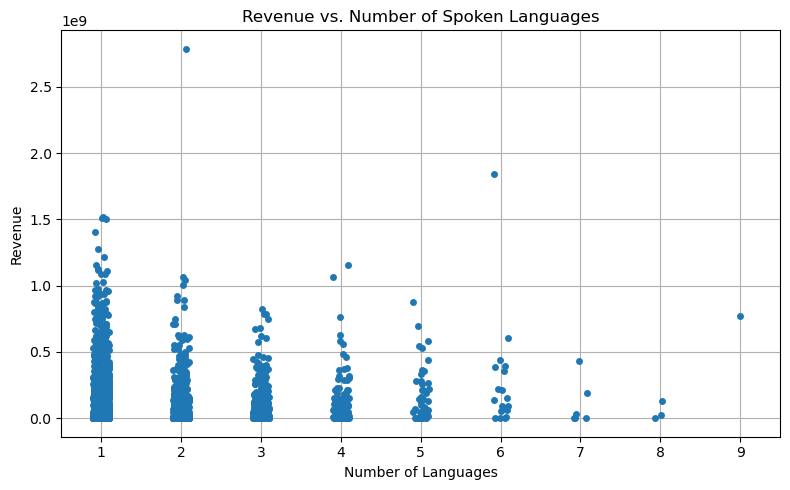

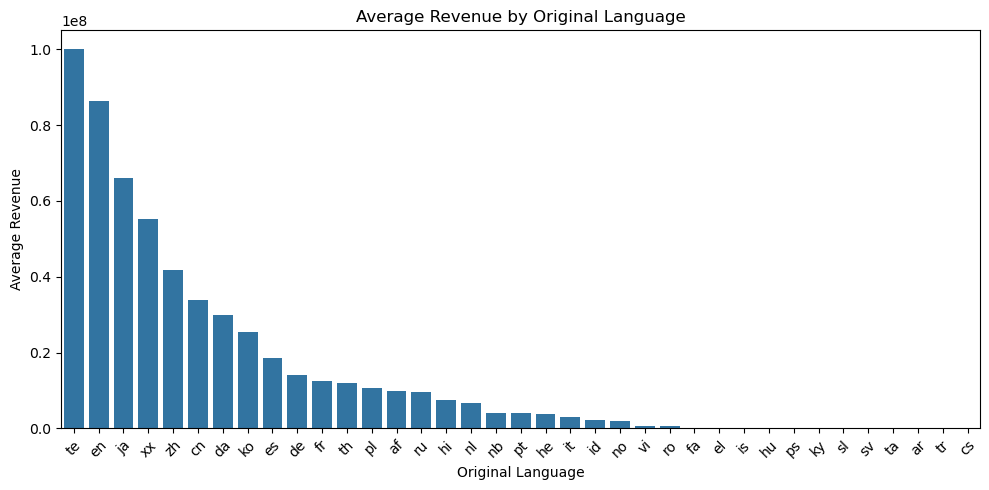

In [11]:
# Filter to only spoken languages
spoken_langs = movie_languages[movie_languages['language_role_id'] == 2]

# Count number of spoken languages per movie
language_counts = spoken_langs.groupby('movie_id').size().reset_index(name='num_languages')

# Merge with movie revenue
language_revenue = movie[['movie_id', 'revenue']].merge(language_counts, on='movie_id')

# Plot: Revenue vs. Number of Spoken Languages
plt.figure(figsize=(8,5))
sns.stripplot(x='num_languages', y='revenue', data=language_revenue, jitter=True)
plt.title('Revenue vs. Number of Spoken Languages')
plt.xlabel('Number of Languages')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter to only original languages
original_langs = movie_languages[movie_languages['language_role_id'] == 1]

# Join with language table to get names or codes
original_langs = original_langs.merge(language, on='language_id')

# Merge with movie to get revenue
original_langs = original_langs.merge(movie[['movie_id', 'revenue']], on='movie_id')

# Group by original language code and calculate average revenue
lang_avg_revenue = original_langs.groupby('language_code')['revenue'].mean().reset_index()

# Sort and plot
lang_avg_revenue = lang_avg_revenue.sort_values(by='revenue', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='language_code', y='revenue', data=lang_avg_revenue)
plt.title('Average Revenue by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## _10. Country Production Report_

Skills: Geographic analysis, Grouping

- Number of movies produced by country.

- Top 5 countries with highest average revenue.

- Are certain countries associated with higher-budget movies?

In [12]:
# Merge to get country names
country_merged = production_country.merge(country, on='country_id')

# Count number of movies per country
movie_counts = country_merged.groupby('country_name')['movie_id'].nunique().reset_index()
movie_counts.columns = ['country', 'movie_count']
movie_counts = movie_counts.sort_values(by='movie_count', ascending=False)

display(movie_counts.head(10))  

# Merge movie revenue with production countries
country_revenue = country_merged.merge(movie[['movie_id', 'revenue']], on='movie_id')

# Group by country and calculate average revenue
avg_revenue = country_revenue.groupby('country_name')['revenue'].mean().reset_index()
avg_revenue = avg_revenue.sort_values(by='revenue', ascending=False)

# Top 5 countries by average revenue
top_5_revenue = avg_revenue.head(5)
display(top_5_revenue)

# Merge movie budget with countries
country_budget = country_merged.merge(movie[['movie_id', 'budget']], on='movie_id')

# Group by country and calculate average budget
avg_budget = country_budget.groupby('country_name')['budget'].mean().reset_index()
avg_budget = avg_budget.sort_values(by='budget', ascending=False)

# Display countries with highest average budgets
display(avg_budget.head(10))


,country,movie_count
87,United States of America,3956
86,United Kingdom,636
30,Germany,324
29,France,306
16,Canada,261
5,Australia,110
42,Italy,72
77,Spain,71
18,China,59
44,Japan,58


,country_name,revenue
23,Dominica,1.065660e+09
43,Jamaica,5.626299e+08
54,Malta,4.666267e+08
7,Bahamas,3.035936e+08
59,New Zealand,2.973444e+08


,country_name,budget
23,Dominica,200000000.0
54,Malta,137500000.0
74,Slovenia,112500000.0
43,Jamaica,100475000.0
59,New Zealand,74375000.0
57,Morocco,70000000.0
82,Tunisia,67000000.0
65,Philippines,66000000.0
72,Singapore,66000000.0
21,Czech Republic,61112500.0


# __Project Task 2: Build a Movie Recommendation System with Pandas__

In [43]:
def recommend_movies(movie_df, genre=None, language=None, decade=None, keyword=None, min_rating=None, top_n=10):
    
    df = movie_df.copy()

    # Normalize string columns for safe filtering
    df['genres'] = df['genres'].str.lower()
    df['original_language'] = df['original_language'].str.lower()
    df['keywords'] = df['keywords'].str.lower()

    # Apply filters
    if genre:
        df = df[df['genres'].str.contains(genre.lower(), na=False)]
    if language:
        df = df[df['original_language'].str.contains(language.lower(), na=False)]
    if decade:
        df = df[df['decade'] == decade]
    if keyword:
        df = df[df['keywords'].str.contains(keyword.lower(), na=False)]
    if min_rating:
        df = df[df['vote_average'] >= min_rating]

    # Sort by rating, then popularity
    df = df.sort_values(by=['vote_average', 'popularity'], ascending=False)

    # Return top N recommendations with selected columns
    return df[['title', 'release_year', 'genres', 'overview', 'vote_average', 'popularity']].head(top_n)


In [44]:
movie = pd.read_json("movie.json")  

# Genre Merge
movie_genre_full = movie_genre.merge(genre, on='genre_id')
movie_genres_grouped = movie_genre_full.groupby('movie_id')['genre_name'].apply(lambda x: ', '.join(x)).reset_index()
movie = movie.merge(movie_genres_grouped, on='movie_id', how='left')
movie.rename(columns={'genre_name': 'genres'}, inplace=True)

# Keyword Merge
movie_keywords_full = movie_keywords.merge(keyword, on='keyword_id')
movie_keywords_grouped = movie_keywords_full.groupby('movie_id')['keyword_name'].apply(lambda x: ' '.join(x)).reset_index()
movie = movie.merge(movie_keywords_grouped, on='movie_id', how='left')
movie.rename(columns={'keyword_name': 'keywords'}, inplace=True)

# Original Language Merge
original_lang = movie_languages[movie_languages['language_role_id'] == 1]
original_lang = original_lang.merge(language, on='language_id')
original_lang = original_lang[['movie_id', 'language_name']]
original_lang.rename(columns={'language_name': 'original_language'}, inplace=True)
movie = movie.merge(original_lang, on='movie_id', how='left')

# Add release_year and decade 
movie['release_date'] = pd.to_datetime(movie['release_date'], errors='coerce')
movie['release_year'] = movie['release_date'].dt.year
movie['decade'] = (movie['release_year'] // 10 * 10).astype('Int64').astype(str) + 's'


In [45]:
def recommend_movies(movie_df, genre=None, language=None, decade=None, keyword=None, min_rating=None, top_n=10):
    
    df = movie_df.copy()

    # Normalize string columns
    df['genres'] = df['genres'].str.lower()
    df['original_language'] = df['original_language'].str.lower()
    df['keywords'] = df['keywords'].str.lower()

    print("Starting rows:", len(df))

    # Apply filters
    if genre:
        df = df[df['genres'].str.contains(genre.lower(), na=False)]
        print("After genre:", len(df))

    if language:
        df = df[df['original_language'].str.contains(language.lower(), na=False)]
        print("After language:", len(df))

    if decade:
        df = df[df['decade'] == decade]
        print("After decade:", len(df))

    if keyword:
        df = df[df['keywords'].str.contains(keyword.lower(), na=False)]
        print("After keyword:", len(df))

    if min_rating:
        df = df[df['vote_average'] >= min_rating]
        print("After rating:", len(df))
    
    # Sort by rating, then popularity
    df = df.sort_values(by=['vote_average', 'popularity'], ascending=False)

    return df[['title', 'release_year', 'genres', 'overview', 'vote_average', 'popularity']].head(top_n)


In [54]:
recommend_movies(movie, genre='comedy', language='english', decade='2010s', keyword='', min_rating=5.0)

Starting rows: 4803
After genre: 1722
After language: 1647
After decade: 434
After rating: 386


,title,release_year,genres,overview,vote_average,popularity
4759,Me You and Five Bucks,2015.0,"drama, comedy, romance","A womanizing yet lovable loser, Charlie, a wai...",10.0,0.094105
4153,Inside Out,2015.0,"animation, drama, comedy, family","Growing up can be a bumpy road, and it's no ex...",8.0,128.655964
4065,The Grand Budapest Hotel,2014.0,"drama, comedy",The Grand Budapest Hotel tells of a legendary ...,8.0,74.417456
4750,Karachi se Lahore,2015.0,"comedy, family",A road trip from Karachi to Lahore where 5 fri...,8.0,0.060003
4007,The Wolf of Wall Street,2013.0,"drama, comedy, crime",A New York stockbroker refuses to cooperate in...,7.9,95.007934
4230,Big Hero 6,2014.0,"adventure, animation, action, comedy, family",The special bond that develops between plus-si...,7.8,203.734590
4070,About Time,2013.0,"drama, comedy, science fiction",The night after another unsatisfactory New Yea...,7.8,74.817641
3778,Kevin Hart: Laugh at My Pain,2011.0,"comedy, documentary",Experience the show that quickly became a nati...,7.7,5.498834
4217,Along the Roadside,2013.0,"comedy, music, romance",Road movie about two young people from differe...,7.7,0.166655
3885,How to Train Your Dragon 2,2014.0,"adventure, fantasy, animation, action, comedy,...",The thrilling second chapter of the epic How T...,7.6,100.213910
